In [1]:
import pandas as pd

# Lecture des deux fichiers
df_09_17 = pd.read_csv("../data/LFB Incident data from 2009 - 2017.csv", encoding="latin1", low_memory=False)
colnames = [
    "IncidentNumber",
    "DateOfCall",
    "CalYear",
    "TimeOfCall",
    "HourOfCall",
    "IncidentGroup",
    "StopCodeDescription",
    "SpecialServiceType",
    "PropertyCategory",
    "PropertyType",
    "AddressQualifier",
    "Postcode_full",
    "Postcode_district",
    "UPRN",
    "USRN",
    "IncGeo_BoroughCode",
    "IncGeo_BoroughName",
    "ProperCase",
    "IncGeo_WardCode",
    "IncGeo_WardName",
    "IncGeo_WardNameNew",
    "Easting_m",
    "Northing_m",
    "Easting_rounded",
    "Northing_rounded",
    "Latitude",
    "Longitude",
    "FRS",
    "IncidentStationGround",
    "FirstPumpArriving_AttendanceTime",
    "FirstPumpArriving_DeployedFromStation",
    "SecondPumpArriving_AttendanceTime",
    "SecondPumpArriving_DeployedFromStation",
    "NumStationsWithPumpsAttending",
    "NumPumpsAttending",
    "PumpCount",
    "PumpMinutesRounded",
    "Notional Cost (£)",
    "NumCalls"
]
df_18 = pd.read_csv("../data/LFB Incident data from 2018.csv", names=colnames, header=None, encoding="latin1", low_memory=False)

df_09_17.columns.tolist()

['ï»¿IncidentNumber',
 'DateOfCall',
 'CalYear',
 'TimeOfCall',
 'HourOfCall',
 'IncidentGroup',
 'StopCodeDescription',
 'SpecialServiceType',
 'PropertyCategory',
 'PropertyType',
 'AddressQualifier',
 'Postcode_full',
 'Postcode_district',
 'UPRN',
 'USRN',
 'IncGeo_BoroughCode',
 'IncGeo_BoroughName',
 'ProperCase',
 'IncGeo_WardCode',
 'IncGeo_WardName',
 'IncGeo_WardNameNew',
 'Easting_m',
 'Northing_m',
 'Easting_rounded',
 'Northing_rounded',
 'Latitude',
 'Longitude',
 'FRS',
 'IncidentStationGround',
 'FirstPumpArriving_AttendanceTime',
 'FirstPumpArriving_DeployedFromStation',
 'SecondPumpArriving_AttendanceTime',
 'SecondPumpArriving_DeployedFromStation',
 'NumStationsWithPumpsAttending',
 'NumPumpsAttending',
 'PumpCount',
 'PumpMinutesRounded',
 'Notional Cost (Â£)',
 'NumCalls']

In [2]:
df_09_17.rename(columns={
    "ï»¿IncidentNumber": "IncidentNumber",
    "Notional Cost (Â£)": "Notional Cost (£)"
}, inplace=True)

In [3]:
# Colonnes communes pertinentes
cols_common = [
    "IncidentNumber", "CalYear", "IncidentGroup",
    "FirstPumpArriving_AttendanceTime", "Notional Cost (£)"
]

df_09_17 = df_09_17[cols_common].copy()
df_18 = df_18[cols_common].copy()

# Nettoyage des colonnes
for df in [df_09_17, df_18]:
    df["Notional Cost (£)"] = (
        df["Notional Cost (£)"]
        .replace('[£,]', '', regex=True)
        .replace('NULL', pd.NA)
        .astype(float)
    )
    df["FirstPumpArriving_AttendanceTime"] = pd.to_numeric(df["FirstPumpArriving_AttendanceTime"], errors="coerce")
    df["CalYear"] = pd.to_numeric(df["CalYear"], errors="coerce")

# Concaténation
df_incident_all = pd.concat([df_09_17, df_18], ignore_index=True)

# Nettoyage et filtrage 2015–2025
df_incident_all = df_incident_all[
    (df_incident_all["CalYear"].between(2015, 2025)) &
    (df_incident_all["Notional Cost (£)"] > 0) &
    (df_incident_all["FirstPumpArriving_AttendanceTime"] > 0) &
    (df_incident_all["FirstPumpArriving_AttendanceTime"] < 3600)
]

print("✅ Données combinées :", df_incident_all.shape)
df_incident_all.head()

✅ Données combinées : (1074861, 5)


,IncidentNumber,CalYear,IncidentGroup,FirstPumpArriving_AttendanceTime,Notional Cost (£)
682096,1151.00,2015,Special Service,282.0,315.0
682097,4151.00,2015,Fire,404.0,295.0
682099,8151.00,2015,Fire,299.0,295.0
682100,10151.00,2015,Special Service,401.0,295.0
682101,13151.00,2015,Fire,362.0,443.0


In [7]:
import os
import matplotlib.pyplot as plt

# Création automatique du dossier ../figures
figures_dir = "../figures"
os.makedirs(figures_dir, exist_ok=True)

def savefig(name, dpi=300):
    """
    Sauvegarde le graphique courant dans le dossier ../figures
    name : str -> nom du fichier (ex: 'graphique1.png')
    dpi : résolution de l'image (par défaut 300 pour impression)
    """
    path = os.path.join(figures_dir, name)
    plt.savefig(path, dpi=dpi, bbox_inches="tight")
    print(f"✅ Figure sauvegardée : {path}")

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corrélation linéaire et monotone
pearson = df_incident_all["FirstPumpArriving_AttendanceTime"].corr(df_incident_all["Notional Cost (£)"])
spearman = df_incident_all["FirstPumpArriving_AttendanceTime"].corr(df_incident_all["Notional Cost (£)"], method="spearman")

print(f"Corrélation de Pearson : {pearson:.3f}")
print(f"Corrélation de Spearman : {spearman:.3f}")

Corrélation de Pearson : 0.006
Corrélation de Spearman : 0.016


✅ Figure sauvegardée : ../figures/Lien entre délai d'intervention et cout estimé 2015-2025.png


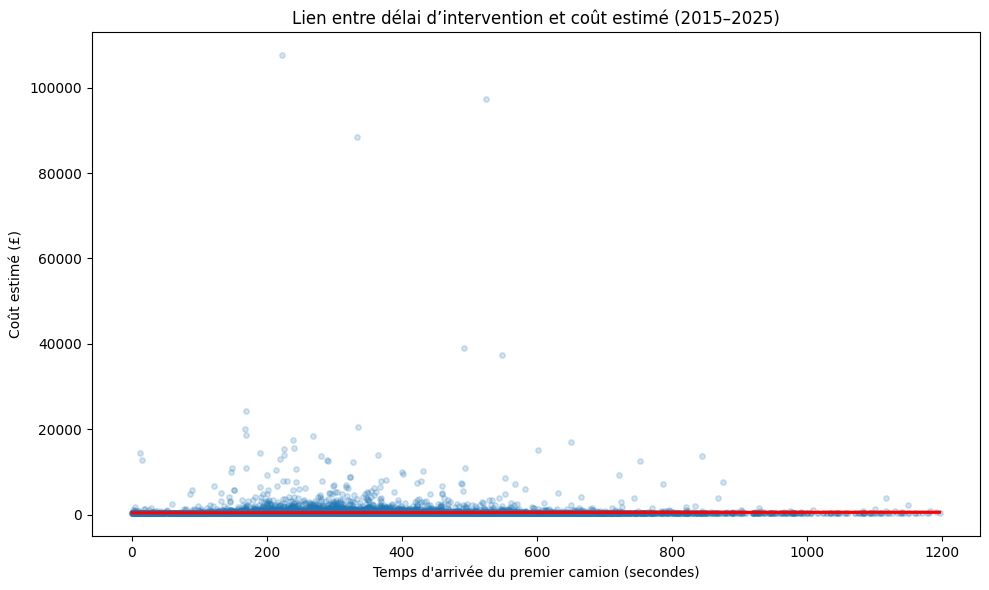

In [8]:
plt.figure(figsize=(10,6))
sns.regplot(
    x="FirstPumpArriving_AttendanceTime",
    y="Notional Cost (£)",
    data=df_incident_all.sample(30000, random_state=42),  # échantillon pour lisibilité
    scatter_kws={'alpha':0.2, 's':15},
    line_kws={'color':'red'}
)
plt.title("Lien entre délai d’intervention et coût estimé (2015–2025)")
plt.xlabel("Temps d'arrivée du premier camion (secondes)")
plt.ylabel("Coût estimé (£)")
plt.tight_layout()

savefig("Lien entre délai d'intervention et cout estimé 2015-2025.png")

plt.show()

✅ Figure sauvegardée : ../figures/Cout median selon la durée d'intervention.png


/var/folders/92/06dyt7211kj9_m0d_wvhs1tw0000gn/T/ipykernel_45115/3471449621.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("bin_delay", as_index=False)


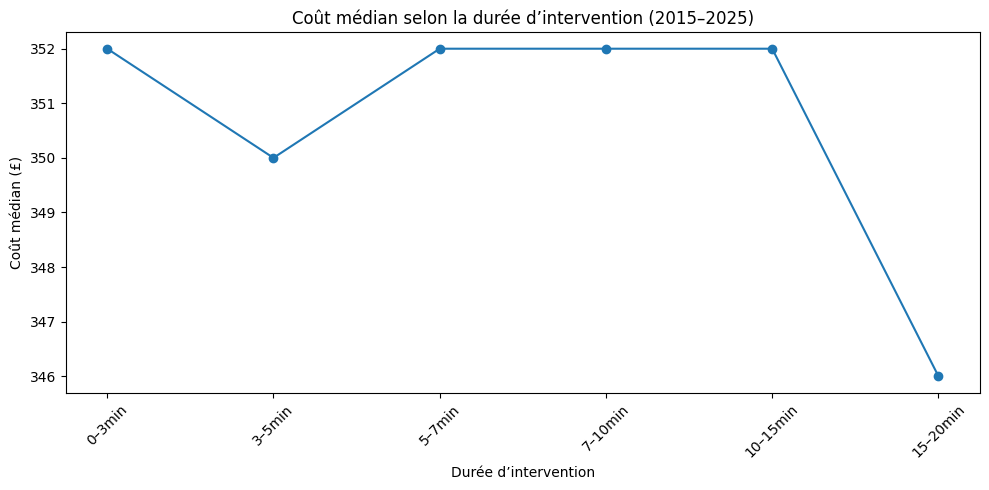

,bin_delay,cost_median
0,0–3min,352.0
1,3–5min,350.0
2,5–7min,352.0
3,7–10min,352.0
4,10–15min,352.0
5,15–20min,346.0
6,20–30min,NaN
7,30–40min,NaN
8,40–60min,NaN


In [9]:
# Création de classes de durée (en secondes)
bins = [0,180,300,420,600,900,1200,1800,2400,3600]
labels = ["0–3min","3–5min","5–7min","7–10min","10–15min","15–20min","20–30min","30–40min","40–60min"]

df_group = (
    df_incident_all
    .assign(bin_delay = pd.cut(df_incident_all["FirstPumpArriving_AttendanceTime"], bins=bins, labels=labels))
    .groupby("bin_delay", as_index=False)
    .agg(cost_median=("Notional Cost (£)", "median"))
)

plt.figure(figsize=(10,5))
plt.plot(df_group["bin_delay"].astype(str), df_group["cost_median"], marker="o")
plt.title("Coût médian selon la durée d’intervention (2015–2025)")
plt.xlabel("Durée d’intervention")
plt.ylabel("Coût médian (£)")
plt.xticks(rotation=45)
plt.tight_layout()

savefig("Cout median selon la durée d'intervention.png")

plt.show()

df_group

In [10]:
df_type = (
    df_incident_all
    .groupby("IncidentGroup", as_index=False)
    .agg(cost_median=("Notional Cost (£)", "median"),
         delay_median=("FirstPumpArriving_AttendanceTime", "median"))
    .sort_values("cost_median", ascending=False)
)
df_type

,IncidentGroup,cost_median,delay_median
1,Fire,352.0,305.0
2,Special Service,352.0,309.0
0,False Alarm,346.0,289.0


✅ Figure sauvegardée : ../figures/cout_et_delai_medians_par_type.png


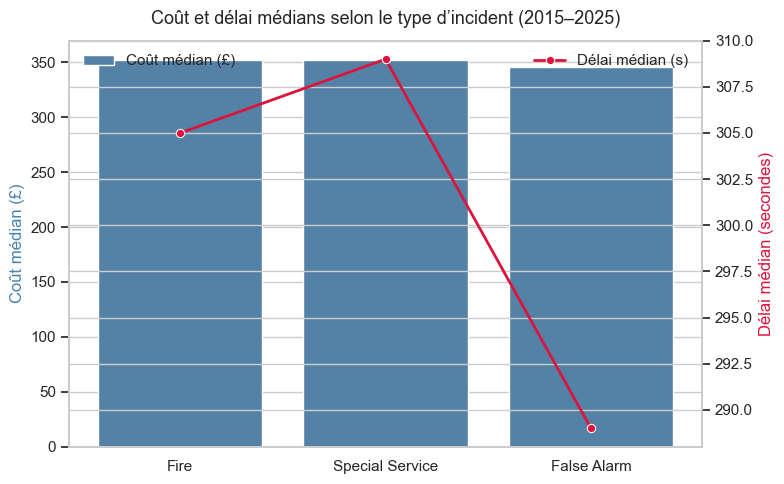

In [11]:
# Style général
sns.set_theme(style="whitegrid")

# Création de la figure
fig, ax1 = plt.subplots(figsize=(8,5))

# Barres : coût médian (£)
sns.barplot(
    data=df_type,
    x="IncidentGroup",
    y="cost_median",
    color="steelblue",
    ax=ax1,
    label="Coût médian (£)"
)

# Deuxième axe : délai médian (secondes)
ax2 = ax1.twinx()
sns.lineplot(
    data=df_type,
    x="IncidentGroup",
    y="delay_median",
    color="crimson",
    marker="o",
    linewidth=2,
    ax=ax2,
    label="Délai médian (s)"
)

# Titres et axes
ax1.set_title("Coût et délai médians selon le type d’incident (2015–2025)", fontsize=13, pad=12)
ax1.set_xlabel("")
ax1.set_ylabel("Coût médian (£)", color="steelblue")
ax2.set_ylabel("Délai médian (secondes)", color="crimson")

# Légendes combinées
ax1.legend(loc="upper left", frameon=False)
ax2.legend(loc="upper right", frameon=False)

plt.tight_layout()

# Sauvegarde via ta fonction
savefig("cout_et_delai_medians_par_type.png")
plt.show()
